# Module 02: A Box Model of Land-Atmosphere Carbon Balance

### 1. Introduction


In [1]:
import numpy as np
import matplotlib.pyplot as plt

M1i = 1100.0
M2i = 300.0

k12 = 0.075 
k21 = 0.1

ti = 0.0
tf = 20.0
dt = 0.01


In [2]:
t = np.arange(ti,tf+dt,dt)

Nt = t.size

print('t has '+str(Nt)+' time steps')

t has 2002 time steps


In [3]:
M1 = np.zeros((Nt,))
M2 = np.zeros((Nt,))

In [4]:
for i in np.arange(Nt):
    
    # assign the initial condition
    if (i==0):

        M1[i] = M1i
        M2[i] = M2i
        
    else:
        
        # solve the differential equation
        dM1dt = k21*M2[i-1] - k12*M1[i-1]
        dM2dt = k12*M1[i-1] - k21*M2[i-1]
        
        M1[i] = M1[i-1] + dM1dt*dt
        M2[i] = M2[i-1] + dM2dt*dt


In [5]:
# This part is the analytical solution to the differential equation

M1_anlt = (k21*(M1i+M2i))/(k12+k21) + (k12*M1i - k21*M2i)/(k12+k21)*np.exp(-(k12+k21)*t)
M2_anlt = (k12*(M1i+M2i))/(k12+k21) - (k12*M1i - k21*M2i)/(k12+k21)*np.exp(-(k12+k21)*t)

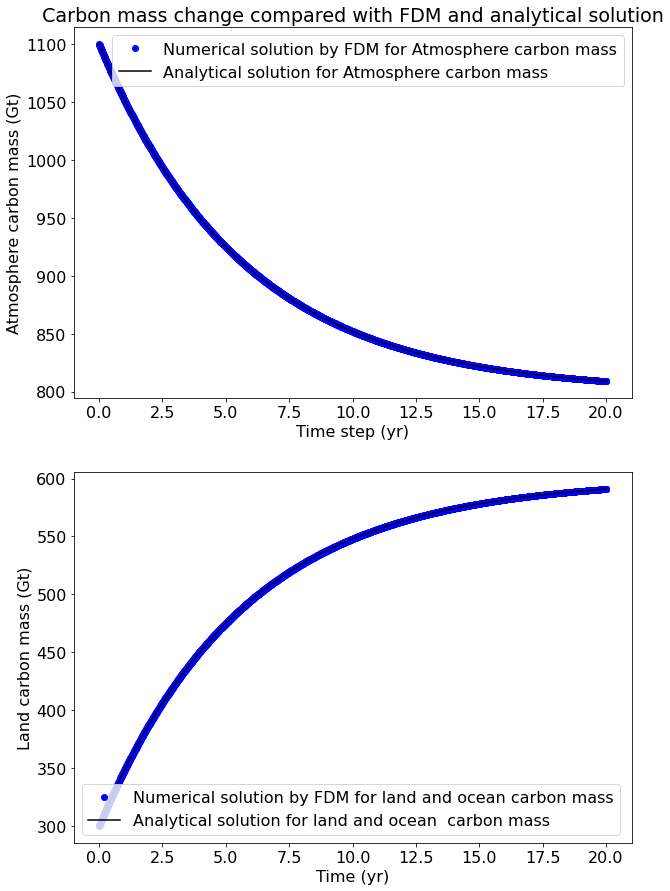

In [8]:
plt.figure(figsize=(10,15))
plt.rcParams.update({'font.size': 16})


plt.subplot(2,1,1)
plt.plot(t,M1,'bo', label='Numerical solution by FDM for Atmosphere carbon mass')
plt.plot(t,M1_anlt,'k-', label='Analytical solution for Atmosphere carbon mass')
plt.xlabel('Time step (yr)')
plt.ylabel('Atmosphere carbon mass (Gt)')
plt.title('Carbon mass change compared with FDM and analytical solution')
plt.legend()

plt.subplot(2,1,2)
plt.plot(t,M2,'bo', label='Numerical solution by FDM for land and ocean carbon mass')
plt.plot(t,M2_anlt,'k-', label='Analytical solution for land and ocean  carbon mass')
plt.xlabel('Time (yr)')
plt.ylabel('Land carbon mass (Gt)')
plt.legend()
plt.show()
